## Importing all the necessary libraries

In [152]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set_style('whitegrid')

## Reading the Excel data file

In [137]:
#importing excel file
df = pd.read_excel("Business Analyst-Case Study.xlsx", sheet_name ='dataset')

## Checking how our data looks like and gathering basic info about it

In [5]:
#checking how our database looklike
df.head()

,Call Date,Account Angaza ID,Call Type,Next Payment Date,Payment_time
0,2018-03-01,1072717,Followup_call,2018-03-01,0.0
1,2018-03-01,1151658,1st_call,2018-03-01,0.0
2,2018-03-01,497633,Followup_call,2018-03-01,0.0
3,2018-03-01,1186908,Followup_call,2018-03-01,0.0
4,2018-03-01,84150,Followup_call,2018-03-01,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535016 entries, 0 to 535015
Data columns (total 5 columns):
Call Date             535016 non-null datetime64[ns]
Account Angaza ID     535016 non-null int64
Call Type             535016 non-null object
 Next Payment Date    459299 non-null datetime64[ns]
Payment_time          459299 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 20.4+ MB


## Adding a new column to identify any pattern on weekdays

In [138]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Weekdayno']=df['Call Date'].dt.dayofweek
df['Weekday']=df['Weekdayno'].map(dmap)
df.head()

,Call Date,Account Angaza ID,Call Type,Next Payment Date,Payment_time,Weekdayno,Weekday
0,2018-03-01,1072717,Followup_call,2018-03-01,0.0,3,Thu
1,2018-03-01,1151658,1st_call,2018-03-01,0.0,3,Thu
2,2018-03-01,497633,Followup_call,2018-03-01,0.0,3,Thu
3,2018-03-01,1186908,Followup_call,2018-03-01,0.0,3,Thu
4,2018-03-01,84150,Followup_call,2018-03-01,0.0,3,Thu


## Exploratory Data Analysis (EDA)

In [142]:
# Payment_time tells in how many days a user has completed the payment
df['Payment_time'].describe()

count    459299.000000
mean         11.696366
std          17.015614
min           0.000000
25%           1.000000
50%           5.000000
75%          14.000000
max         120.000000
Name: Payment_time, dtype: float64

### Here on an average a person takes 11.69 days to complete the payment whereas 50% of our users complete the payment in less than or equal to 5 days

## Plotting a few graphs to understand our data better

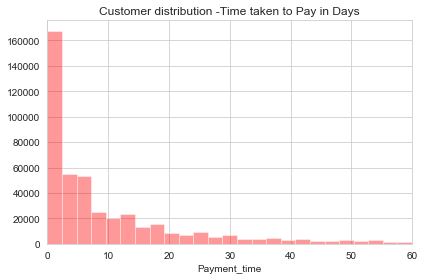

In [144]:
plt.xlim(0,60)
sns.distplot(df[df['Payment_time'].notnull()]['Payment_time'],kde=False,bins=50,color ='red')
plt.title('Customer distribution -Time taken to Pay in Days')
plt.tight_layout()
# it tells that we have a right skewed distribution or positive distribution where median< mean
# tail at right hand side

## Since the data is right skewed, median gives a more appropriate idea of data distribution

## Answer of Question 1
### Suitable X = 5

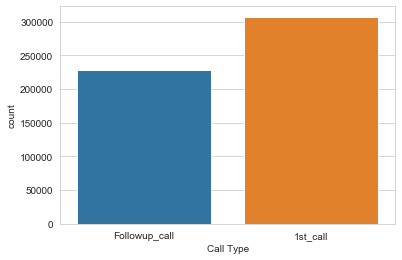

In [145]:
sns.countplot(x='Call Type',data= df)

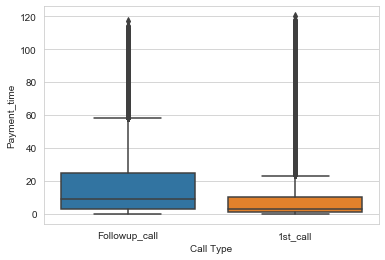

In [148]:
sns.boxplot(x='Call Type',y='Payment_time',data = df)

## In the above box plot is clearly observed that customers who got 1st_call took lesser number of days to complete the payment than the customers who received the followup_call

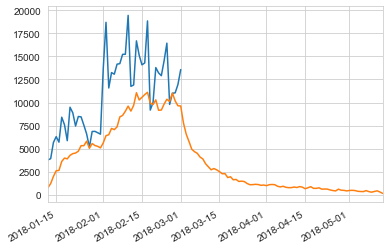

In [155]:
#plt.xlim([datetime.date(2018, 1, 12), datetime.date(2018, 3, 1)])
df['Call Date'].value_counts().plot()
df[df[' Next Payment Date'].notnull()][' Next Payment Date'].value_counts().plot()

In [166]:
totalcalls = df.groupby(['Call Date','Call Type','Weekday']).count()['Account Angaza ID']
paymentdone = df.groupby([' Next Payment Date','Call Type','Weekday']).count()['Payment_time']

In [167]:
df_new = pd.concat([totalcalls,paymentdone],axis=1)
df_new.rename(columns={'Account Angaza ID':'Calls Made','Payment_time':'Successful Payment'},inplace= True)
df_new['Percentage conversion']=df_new['Successful Payment']*100/df_new['Calls Made']

In [168]:
df_new.reset_index(inplace= True)
df_new.head()

,level_0,level_1,level_2,Calls Made,Successful Payment,Percentage conversion
0,2018-01-12,1st_call,Fri,3513.0,725,20.637632
1,2018-01-12,Followup_call,Fri,272.0,33,12.132353
2,2018-01-13,1st_call,Fri,NaN,456,NaN
3,2018-01-13,1st_call,Sat,3722.0,726,19.505642
4,2018-01-13,Followup_call,Fri,NaN,14,NaN


In [169]:
df_new.rename(columns={'level_0':'Call_date','level_1':'Call_type','level_2':'Weekday'},inplace= True)
df_new.head()

,Call_date,Call_type,Weekday,Calls Made,Successful Payment,Percentage conversion
0,2018-01-12,1st_call,Fri,3513.0,725,20.637632
1,2018-01-12,Followup_call,Fri,272.0,33,12.132353
2,2018-01-13,1st_call,Fri,NaN,456,NaN
3,2018-01-13,1st_call,Sat,3722.0,726,19.505642
4,2018-01-13,Followup_call,Fri,NaN,14,NaN


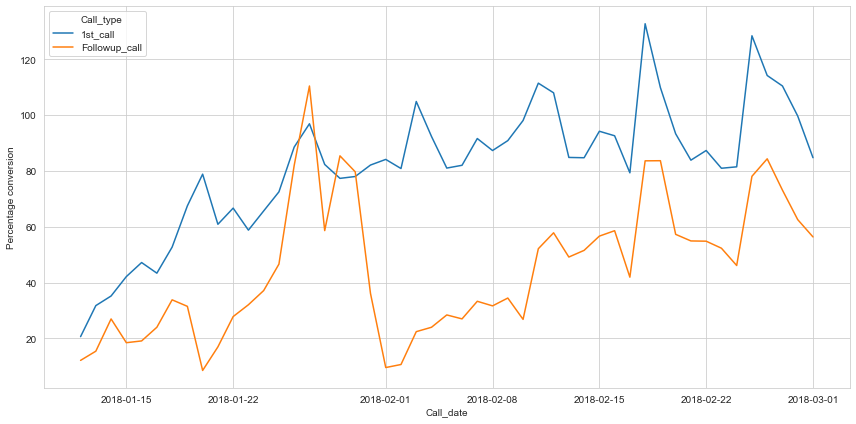

In [162]:
fig= plt.figure(figsize=(12,6))
sns.lineplot(x='Call_date',y='Percentage conversion',data=df_new, hue='Call_type')
plt.tight_layout()

### Percentage more than 100% signals that on that particular day more people paid their dues compared to the number of calls we made.
### Here percentage conversion is higher for customers who got their 1st call compared to customers whom we followed up. Every 2 weeks we see a surge in customers payment who got follow up calls

In [164]:
## median values for each type of call
df[df['Payment_time'].notnull()].groupby('Call Type').median()['Payment_time']

Call Type
1st_call         3.0
Followup_call    9.0
Name: Payment_time, dtype: float64

In [165]:
## Mean values for each type of call
df[df['Payment_time'].notnull()].groupby('Call Type').mean()['Payment_time']

Call Type
1st_call          8.424624
Followup_call    17.655356
Name: Payment_time, dtype: float64

# <font color='green'>Summary</font>

### At an overall level, we observed that on an average (mean) a customer makes payment in ~12 days whereas 50% of the users pay in less than 5 days (Median distribution)
### Since our data is right-skewed, we will consider median distribution
### When we study the data more deeply, we find that 50% of the customers take 3 days to pay where call type is 'First_call' whereas 50% all those customers whom we 'follow up' takes 9 days to clear the dues

# <font color='red'>Conclusion</font>
## <font color='navy'>First payment call to a customer should be made on weekends and we should wait for 3 days for him to clear the dues. After that the follow up call will be made on 4th day. Third call should be scheduled 9 days after the 2nd call  i.e on 13th day. After 2nd call, all calls should be made after 9 days</font>